<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Duplex Melting</font></h2> 

In [1]:
from umbrella_sampling import ComUmbrellaSampling, MeltingUmbrellaSampling
from oxdna_simulation import SimulationManager, Simulation, Observable
from wham_analysis import collect_coms
import os
import matplotlib.pyplot as plt
from vmmc import *
from collections import Counter
from parameter_search import *
import numpy as np
from skopt import Optimizer
from skopt.space import Categorical, Space
%load_ext autoreload
%autoreload 2

In [4]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/multi_system_runs')
system = f'{path}/duplex_50'
us = MeltingUmbrellaSampling(path, system)


/home/mlsample/.local/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
hist = us.continuous_to_discrete_unbiasing(8)

In [ ]:
hb_values_array = [self.hb_by_window[idx].values.T[0] for idx in range(self.n_windows)]

bins = list(np.linspace(0, max_hb, max_hb +1, dtype=int))
counts_i_b = [np.bincount(hb_values, minlength=max_hb+1) for hb_values in hb_values_array]
numerator = np.sum(counts_i_b, axis=0)

bias = [value.values.T[0] for value in self.umbrella_bias]
F_i = [float(F) for F in self.get_biases()]
beta = 1 / self.temperature
denominator = np.array([sum(counts) * np.exp((F - w) * beta) for counts, F, w in zip(counts_i_b, F_i, bias)])
   
unbiased_discrete_window = np.array([np.zeros(max_hb + 1) for _ in range(self.n_windows)]
for idx in range(self.n_windows):
    np.add.at(unbiased_discrete_window[idx], hb_values_array[idx], denominator[idx])
    
denominator = np.sum(unbiased_discrete_window, axis=0)

In [ ]:
true = hist[0] / hist[1]

normed = true / sum(true)

plt.plot(range(9), normed)

In [ ]:
us.calculate_melting_temperature_using_vmmc()

In [ ]:
plt.plot(range(9), us.free_energy_discrete)

In [ ]:
us.free

In [ ]:
us.plot_free()

In [ ]:
us.get_com_distance_by_window()
us.get_bias_potential_value(us.wham.xmin, us.wham.xmax, us.n_windows, us.wham.umbrella_stiff)
us.get_r0_values()

In [ ]:
beta = 1/us.temperature
beta

In [5]:
F_i = np.array([float(F) for F in us.get_biases()])
bins = np.linspace(us.wham.xmin, us.wham.xmax, 200)
temp = [np.histogram(com_values, bins=bins) for com_values in us.com_by_window.values()]
p_i_b = np.array([value[0] for value in temp])

AttributeError: 'NoneType' object has no attribute 'values'

In [ ]:
numerator = np.sum(p_i_b, axis=0)

In [ ]:
denominator = np.array([sum(counts) * np.exp((F - w) * beta) for counts, F, w in zip(p_i_b, F_i, window_biases)])

In [ ]:
p_x = numerator / np.sum(denominator, axis=0)[1:]

In [6]:
def w_i(r, r0, stiff):
    return 0.5 * float(stiff) * (r - r0)**2
window_biases = np.array([np.array([w_i(bin_value, r0_value, us.wham.umbrella_stiff) for bin_value in bins], dtype=np.longdouble) for r0_value in us.r0])

AttributeError: 'MeltingUmbrellaSampling' object has no attribute 'r0'

In [ ]:
plt.plot(bins[1:], -np.log(p_x))

In [ ]:
bias = np.array([value.values.T[0] for value in us.umbrella_bias], dtype=np.longdouble)
bias.shape

In [ ]:
bias_term = np.exp(beta * bias, dtype=np.longdouble)
bias_term.shape

In [ ]:
ensemble_bias_numerator = np.sum(np.exp(-beta * bias_term), axis=1)
ensemble_bias_denominator = np.full((bias_term.shape[0]), bias_term.shape[1])

ensemble_bias_term = ensemble_bias_numerator / ensemble_bias_denominator

                                    

In [ ]:
weighted_bias_term = np.array([bias * ensemble_bias for bias, ensemble_bias in zip(bias_term, ensemble_bias_term)])

In [ ]:
a = [value.values.T[0] for value in list(us.com_by_window.values())]


In [ ]:
weights = [1 / w_bias for w_bias in weighted_bias_term]
weights[0].shape

In [ ]:
bins = np.linspace(0, us.wham.xmax, 2000)
bins

In [ ]:
unbiased_counts = [np.histogram(com, bins=bins, weights=weight) for com, weight in zip(a, weights)]
unbiased_hists = [count[0] / sum(count[0]) for count in unbiased_counts]

In [ ]:
for hist in unbiased_hists:
    plt.plot(bins[1:], hist)

In [ ]:
counts = np.array([sum(count[0]) for count in unbiased_counts])
counts = np.full((100), len(weights[0]))
counts

In [ ]:
a_i = np.array([count * np.exp((-beta * bi) + (beta * F)) for count, bi, F in zip(counts, bias, F_i)])

In [ ]:
p_i = [a / sum(a) for a in a_i]
p_i

In [ ]:
window_weight = np.mean(a_i, axis=1) / np.sum(np.mean(a_i, axis=1))
weighted_hist = [hists[0] * weight for hists, weight in zip(unbiased_counts, window_weight)]
window_weight

In [ ]:
combined = np.sum(weighted_hist, axis=0)
combined.shape

In [ ]:
plt.plot(bins[1:], combined)

In [ ]:
for hist in weighted_hist:
    plt.plot(bins[1:], hist)

In [ ]:
bin_width = bins[2] - bins[1]
P_i_b = [p_i / sum(p_i) for p_i in p_i_b]

In [ ]:
plt.figure()
for p_b in P_i_b:
    plt.plot(bins[1:], p_b)

In [ ]:
window_biases.shape

In [ ]:
print(len(P_i_b))
print(len(window_biases))
print(len(ensemble_weight))

In [ ]:

ensemble_weight = [sum(np.exp(-beta * w)) / len(w) for w in window_biases]
weight_per_bin = [np.exp(beta  * w) for w in window_biases]
weigted_bias = [weight * ensemble for weight, ensemble in zip(weight_per_bin, ensemble_weight)]

P_i_u = [P_i * bias[1:] / sum(P_i * bias[1:]) for P_i, bias in zip(P_i_b, weigted_bias)]


In [ ]:
samples_per_window = [len(window) for window in us.com_by_window.values()][0]
F_i = [float(F) for F in F_i]
a_i = [samples_per_window * np.exp((-beta * w) + (beta * F)) for w, F in zip(window_biases, F_i)]

In [ ]:
p_i = a_i / sum(a_i)

In [ ]:
P_u = np.sum([p[1:] * P_i for p, P_i in zip(p_i, P_i_u)], axis=0)


In [ ]:
plt.plot(bins[1:], P_u)

In [ ]:
#Define umbrella sampling param space
param_space = Space([
    Categorical([0.5, 1, 5, 10], name='k_value'),
    Categorical([25, 40, 52, 70], name='temperature'),
    Categorical([True, False], name='unique_binding'),
    Categorical([1, 10, 100, 1000], name='print_every'),
    Categorical([5, 10, 15, 20], name='xmax'),
    Categorical([1e8, 5e8], name='production_step'),
    Categorical([20, 50], name='n_window')
])

inital_parameters = [
 ['10.0', '25', 'False', '10', '5', '500000000.0', '50'],
 ['0.5', '25', 'False', '100', '10', '500000000.0', '50'],
 ['10.0', '70', 'True', '10', '20', '500000000.0', '20']
]
    
#Define ground truth melting
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

vmmc_sim_list[0].analysis.read_vmmc_op_data()
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()
vmmc_sim_list[0].analysis.calculate_and_estimate_melting_profiles()
   
#Define system parameters
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/parameter_scan')
max_hb = 8
com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
vmmc_ground_truth = vmmc_sim_list[0]

#Run
n_iterations = 5
batch_size = 3
run_baysian_hyperparameter_optimization(
    param_space,
    vmmc_ground_truth,
    max_hb, path,
    com_list,
    ref_list,
    n_iterations,
    batch_size,
    resume_state=None,
    inital_parameters=inital_parameters,
    subprocess=False
)

In [ ]:
us = MeltingUmbrellaSampling(file_dir, systems[2])

In [ ]:
us_list[0].continuous_to_discrete_unbiasing(8)

In [ ]:
plt.plot(1 / np.exp(-us_list[0].umbrella_bias[-1] / us_list[0].temperature), rasterized=True)

In [ ]:
a = us.unbiased_discrete_window
b = np.sum(us.unbiased_discrete_window, axis=1, keepdims=True)
normed = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
a

In [ ]:
plt.plot(range(9), us_list[0].free_energy_discrete)

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/parameter_scan')
systems = ['_'.join(params) for params in inital_parameters]
file_dir = path

us_list = [MeltingUmbrellaSampling(file_dir, system) for system in systems[:2]]

In [ ]:
us.calculate_melting_temperature_using_vmmc()

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Potential Energy Umbrella Temperature Interpolation</font></h2> 

In [ ]:
string ="""
10.0_25_False_10_5_500000000.0_50
0.5_25_False_100_10_500000000.0_50
10.0_70_True_10_20_500000000.0_20
""".strip().split('\n')
inital_parameters = []
for st in string:
    inital_parameters.append(st.split('_'))
inital_parameters

In [47]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

# k_value_list = ['5_normal_1', '5_unique_1']
k_value_list = ['10']

systems = [f'duplex_52_{stiff}' for stiff in k_value_list]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 10
n_windows = 100
starting_r0 = 1
steps = 1e6
# stiff = 0.4


pre_equlibration_parameters_list = [{'backend':'CPU','steps':'1e6','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'52C'} for _ in k_value_list]

equlibration_parameters_list = [{'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'52C'} for _ in k_value_list]

production_parameters_list = [{'backend':'CPU','steps':'1e8','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'max_io':'100', 'fix_diffusion_every': '1000',
                        'T':f'52C'} for temp in k_value_list]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [48]:
for us, pre_equlibration_parameters, stiff in zip(us_list, pre_equlibration_parameters_list, k_value_list):
    print(us.system)
    us.build_pre_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, steps,
                               print_every=1000, observable=True, protein=None,
                               force_file=None, continue_run=False)

duplex_52_10


In [49]:
simulation_manager.worker_manager(cpu_run=True, gpu_mem_block=False)

Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Ru

INFO: Lists updated 3652 times (every ~273.822563 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.047 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00102 MB/s

INFO: Lists updated 3294 times (every ~303.582271 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.069 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000966 MB/s



Run time: 22.39351211488247
Finished: 14
Run time: 19.39935874682851
Finished: 33
Run time: 20.700363453943282
Finished: 25


INFO: Lists updated 3306 times (every ~302.480339 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.064 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000872 MB/s

INFO: Lists updated 3170 times (every ~315.457413 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.083 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00101 MB/s

INFO: Lists updated 3568 times (every ~280.269058 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.051 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000948 MB/s



Run time: 23.644681375008076
Finished: 8
Run time: 20.74891652795486
Finished: 26
Run time: 21.638178466120735
Finished: 21
Run time: 19.510220010066405
Finished: 35

INFO: Lists updated 3113 times (every ~321.233537 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.080 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000826 MB/s

INFO: Lists updated 3444 times (every ~290.360046 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.114 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000951 MB/s

INFO: Lists updated 3216 times (every ~310.945274 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.057 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000907 MB/s




Run time: 22.735165708931163
Finished: 15
Run time: 23.277103678090498
Finished: 12Run time: 22.298379061976448

Finished: 18
Run time: 22.010693395975977
Finished: 20
Run time: 18.989646709989756
Finished: 39
Run time: 19.151684375014156
Finished: 38


INFO: Lists updated 3045 times (every ~328.407225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.075 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000859 MB/s

INFO: Lists updated 3335 times (every ~299.850075 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.081 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00101 MB/s

INFO: Lists updated 2855 times (every ~350.262697 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.087 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000878 MB/s

INFO: Lists updated 3387 times (every ~295.246531 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.078 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000839 MB/s

INFO: Lists updated 2886 times (every ~346.500347 steps)
INFO: Aggregated I/O statistics (set de

Run time: 24.712078402051702
Finished: 4
Run time: 17.999976417049766
Finished: 46
Run time: 25.126783890184015
Finished: 2
Run time: 24.502727846847847
Finished: 6
Run time: 23.890569984912872
Finished: 10
Run time: 22.812204308109358
Run time: 18.81763602909632Finished: 17

Finished: 42


INFO: Lists updated 2997 times (every ~333.667000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.088 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000789 MB/s

INFO: Lists updated 3283 times (every ~304.599452 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.072 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00111 MB/s

INFO: Lists updated 2938 times (every ~340.367597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.085 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000777 MB/s

INFO: Lists updated 3166 times (every ~315.855970 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.092 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000797 MB/s

INFO: Lists updated 2962 times (every ~337.609723 steps)
INFO: Aggregated I/O statistics (set de

Run time: 19.68282576999627
Finished: 37
Run time: 21.166833891998976
Finished: 28
Run time: 24.563828772865236
Finished: 7
Run time: 16.128948968835175
Finished: 60
Run time: 19.962047070031986
Finished: 36
Run time: 18.09486660407856
Finished: 48


INFO: Lists updated 3598 times (every ~277.932185 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.068 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 3223 times (every ~310.269935 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.082 KB written to files
	 62.000  B written to stdout/stderr
	For a total of    0.001 MB/s

INFO: Lists updated 3548 times (every ~281.848929 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.108 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000929 MB/s

INFO: Lists updated 3058 times (every ~327.011118 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.072 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000793 MB/s

INFO: Lists updated 3369 times (every ~296.823983 steps)
INFO: Aggregated I/O statistics (set de

Run time: 21.0239985359367
Finished: 30
Run time: 25.391907670069486
Finished: 3
Run time: 22.322539605898783Run time: 17.536685094004497

Finished: 22Finished: 52

Run time: 25.87505288911052
Finished: 0
Run time: 22.069792684866115
Finished: 24
Run time: 20.959568643011153
Finished: 31
Run time: 24.22546227904968
Finished: 11Run time: 23.40534239518456

Finished: 16
Run time: 20.83258687192574
Finished: 32
Run time: 18.465034747030586
Finished: 47
Run time: 19.159317124867812
Finished: 43


INFO: Lists updated 3467 times (every ~288.433804 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.071 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000933 MB/s

INFO: Lists updated 2960 times (every ~337.837838 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.091 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000767 MB/s

INFO: Lists updated 3189 times (every ~313.577924 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.081 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000878 MB/s

INFO: Lists updated 3498 times (every ~285.877644 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.086 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 2541 times (every ~393.545848 steps)
INFO: Aggregated I/O statistics (set de

Run time: 25.917353201890364
Finished: 1
Run time: 17.60510020982474
Finished: 53
Run time: 19.780316311167553
Finished: 40
Run time: 18.353517269017175
Finished: 49


INFO: Lists updated 3435 times (every ~291.120815 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.066 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00104 MB/s

INFO: Lists updated 2429 times (every ~411.692054 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.107 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000751 MB/s

INFO: Lists updated 3812 times (every ~262.329486 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.087 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 3235 times (every ~309.119011 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.077 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000997 MB/s

INFO: Lists updated 3678 times (every ~271.886895 steps)
INFO: Aggregated I/O statistics (set de

Run time: 23.289854311849922
Finished: 19
Run time: 19.316265478963032
Finished: 44
Run time: 19.842779722996056
Run time: 24.984597365139052Finished: 41

Run time: 20.952861096011475Finished: 9

Finished: 34
Run time: 16.99077746202238
Finished: 59


INFO: Lists updated 3210 times (every ~311.526480 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.100 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00084 MB/s

INFO: Lists updated 3564 times (every ~280.583614 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.088 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00103 MB/s

INFO: Lists updated 3339 times (every ~299.490866 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.104 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000995 MB/s

INFO: Lists updated 3154 times (every ~317.057705 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.106 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000939 MB/s

INFO: Lists updated 2613 times (every ~382.701875 steps)
INFO: Aggregated I/O statistics (set de

Run time: 25.9773094530683
Finished: 5
Run time: 24.74388151289895
Finished: 13
Run time: 17.719261053949594
Finished: 57
Run time: 22.551639579935
Finished: 27
Run time: 18.932785484939814
Finished: 50
Run time: 19.73319632606581
Finished: 45


INFO: Lists updated 2466 times (every ~405.515004 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.053 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000747 MB/s

INFO: Lists updated 2700 times (every ~370.370370 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.077 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000787 MB/s

INFO: Lists updated 3471 times (every ~288.101412 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.074 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 2946 times (every ~339.443313 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.059 KB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000909 MB/s

INFO: Lists updated 3247 times (every ~307.976594 steps)
INFO: Aggregated I/O statistics (set de

Run time: 18.85651113395579
Finished: 51
Run time: 17.870533684035763
Finished: 58
Run time: 16.29996431595646
Finished: 68


INFO: Lists updated 3357 times (every ~297.885016 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.051 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00105 MB/s

INFO: Lists updated 3641 times (every ~274.649821 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.082 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00111 MB/s

INFO: Lists updated 3693 times (every ~270.782562 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.083 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00123 MB/s



Run time: 18.49572517396882
Finished: 55
Run time: 17.397341581992805
Finished: 62


INFO: Lists updated 3644 times (every ~274.423710 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.091 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00108 MB/s

INFO: Lists updated 3104 times (every ~322.164948 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.103 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00115 MB/s



Run time: 18.601198783842847
Finished: 56
Run time: 17.849002902163193
Finished: 61
Run time: 18.9753102210816
Finished: 54
Run time: 17.168852627975866
Finished: 66


INFO: Lists updated 3327 times (every ~300.571085 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.089 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00107 MB/s

INFO: Lists updated 3397 times (every ~294.377392 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.075 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00112 MB/s

INFO: Lists updated 3320 times (every ~301.204819 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.093 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00107 MB/s

INFO: Lists updated 3363 times (every ~297.353553 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.073 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00116 MB/s



Run time: 17.619058566866443
Finished: 64
Run time: 17.225830873008817
Finished: 67
Run time: 16.30422007688321
Finished: 73
Run time: 16.64362167008221
Finished: 71
Run time: 17.977064614882693
Finished: 63


INFO: Lists updated 3655 times (every ~273.597811 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.102 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 3581 times (every ~279.251606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.050 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00116 MB/s

INFO: Lists updated 3458 times (every ~289.184500 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.085 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00123 MB/s

INFO: Lists updated 3437 times (every ~290.951411 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.095 KB written to files
	 62.000  B written to stdout/stderr
	For a total of   0.0012 MB/s

INFO: Lists updated 3555 times (every ~281.293952 steps)
INFO: Aggregated I/O statistics (set de

Run time: 17.430218124063686
Finished: 70


INFO: Lists updated 3485 times (every ~286.944046 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.070 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00116 MB/s



Run time: 17.79804074205458
Finished: 69


INFO: Lists updated 3263 times (every ~306.466442 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.048 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00117 MB/s



Run time: 17.52730902307667
Finished: 72
Run time: 18.665568282827735
Finished: 65
Run time: 17.16561350086704
Finished: 75


INFO: Lists updated 3594 times (every ~278.241514 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.069 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00115 MB/s

INFO: Lists updated 3752 times (every ~266.524520 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.053 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00115 MB/s

INFO: Lists updated 3406 times (every ~293.599530 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.091 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00117 MB/s



Run time: 16.542849239893258
Finished: 80
Run time: 16.970260868081823
Finished: 78
Run time: 17.62570421816781
Finished: 74
Run time: 16.021323989145458
Finished: 84
Run time: 16.398774881847203
Finished: 82


INFO: Lists updated 3416 times (every ~292.740047 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.063 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00122 MB/s

INFO: Lists updated 3734 times (every ~267.809320 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.075 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00118 MB/s

INFO: Lists updated 3594 times (every ~278.241514 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.081 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00114 MB/s

INFO: Lists updated 3404 times (every ~293.772033 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.062 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00126 MB/s

INFO: Lists updated 3630 times (every ~275.482094 steps)
INFO: Aggregated I/O statistics (set de

Run time: 17.38466683216393
Finished: 77
Run time: 17.558182002976537
Finished: 76


INFO: Lists updated 3593 times (every ~278.318954 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.068 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00116 MB/s

INFO: Lists updated 3674 times (every ~272.182907 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.064 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00117 MB/s



Run time: 17.487211657920852
Finished: 79


INFO: Lists updated 3488 times (every ~286.697248 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.100 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00115 MB/s



Run time: 16.837024903157726
Finished: 85


INFO: Lists updated 3929 times (every ~254.517689 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.097 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00128 MB/s



Run time: 17.41185129713267
Finished: 83
Run time: 15.63956428389065
Finished: 94
Run time: 16.92583308997564
Finished: 87


INFO: Lists updated 3621 times (every ~276.166805 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.110 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00125 MB/s

INFO: Lists updated 3625 times (every ~275.862069 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.085 KB written to files
	 62.000  B written to stdout/stderr
	For a total of   0.0013 MB/s

INFO: Lists updated 3527 times (every ~283.527077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.083 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00119 MB/s



Run time: 16.39792945003137
Finished: 91


INFO: Lists updated 3678 times (every ~271.886895 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.101 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00122 MB/s



Run time: 15.903037107083946
Finished: 96
Run time: 16.656078380998224
Finished: 92
Run time: 17.21243919292465
Finished: 89
Run time: 18.520520452177152
Finished: 81


INFO: Lists updated 3723 times (every ~268.600591 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.099 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00131 MB/s

INFO: Lists updated 3517 times (every ~284.333239 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.104 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00129 MB/s

INFO: Lists updated 3641 times (every ~274.649821 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.084 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00126 MB/s

INFO: Lists updated 3671 times (every ~272.405339 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.099 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00124 MB/s



Run time: 17.179309523897246
Finished: 90
Run time: 15.902228544000536
Finished: 97


INFO: Lists updated 3562 times (every ~280.741157 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.074 KB written to files
	 62.000  B written to stdout/stderr
	For a total of   0.0012 MB/s

INFO: Lists updated 3716 times (every ~269.106566 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.072 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00128 MB/s



Run time: 18.086372222052887
Finished: 86
Run time: 16.67502946779132
Finished: 95


INFO: Lists updated 3378 times (every ~296.033156 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.083 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00118 MB/s

INFO: Lists updated 3803 times (every ~262.950302 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.069 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00121 MB/s



Run time: 16.26850155601278
Finished: 98


INFO: Lists updated 3649 times (every ~274.047684 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.104 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00125 MB/s



Run time: 16.365142847876996
Finished: 99
Run time: 18.27155956812203
Finished: 88


INFO: Lists updated 3526 times (every ~283.607487 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.076 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00128 MB/s

INFO: Lists updated 3627 times (every ~275.709953 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.062 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00123 MB/s



Run time: 17.938590765930712
Finished: 93


INFO: Lists updated 3588 times (every ~278.706800 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 19.098 KB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00122 MB/s



All queued simulations finished in: 34.08419154305011


In [50]:
for us, equlibration_parameters, stiff in zip(us_list, equlibration_parameters_list, k_value_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters,
                               print_every=1000, observable=True, protein=None,
                               force_file=None, continue_run=False)

duplex_52_10


In [ ]:
for us in us_list[1:]:
    us.modify_topology_for_unique_pairing()

In [51]:
simulation_manager.worker_manager(cpu_run=True, gpu_mem_block=False)

Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Ru

INFO: Lists updated 194550 times (every ~257.003341 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00812 MB/s



Run time: 678.9398521319963
Finished: 51


INFO: Lists updated 196149 times (every ~254.908259 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00803 MB/s



Run time: 678.393613262102
Finished: 70


INFO: Lists updated 196486 times (every ~254.471056 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00804 MB/s



Run time: 684.4534533240367
Finished: 64
Run time: 686.005316341063
Finished: 55


INFO: Lists updated 195314 times (every ~255.998034 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00796 MB/s

INFO: Lists updated 196367 times (every ~254.625268 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00795 MB/s



Run time: 686.5503810560331
Finished: 61


INFO: Lists updated 198268 times (every ~252.183913 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00795 MB/s



Run time: 684.7109904859681
Finished: 75


INFO: Lists updated 196727 times (every ~254.159317 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00796 MB/s



Run time: 687.7647124680225
Finished: 73
Run time: 690.6929709890392
Finished: 57


INFO: Lists updated 195087 times (every ~256.295909 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00793 MB/s

INFO: Lists updated 198451 times (every ~251.951363 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0079 MB/s



Run time: 691.0490117000882
Finished: 69
Run time: 686.8790191749576
Finished: 96


INFO: Lists updated 196178 times (every ~254.870577 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00789 MB/s

INFO: Lists updated 194909 times (every ~256.529970 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00797 MB/s



Run time: 695.9923685120884
Finished: 44


INFO: Lists updated 197933 times (every ~252.610732 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0078 MB/s



Run time: 693.1232320310082
Finished: 66


INFO: Lists updated 195088 times (every ~256.294595 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00786 MB/s



Run time: 694.5437285900116Run time: 690.7111678540241
Finished: 60

Finished: 83
Run time: 689.3293380690739
Finished: 92


INFO: Lists updated 194683 times (every ~256.827766 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0079 MB/s

INFO: Lists updated 198249 times (every ~252.208082 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00787 MB/s

INFO: Lists updated 194926 times (every ~256.507598 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00792 MB/s



Run time: 692.5176585018635
Finished: 81


INFO: Lists updated 198679 times (every ~251.662229 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00788 MB/s



Run time: 691.6439229729585
Finished: 88
Run time: 693.7768183550797
Finished: 76


INFO: Lists updated 199144 times (every ~251.074599 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00792 MB/s

INFO: Lists updated 194866 times (every ~256.586577 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0079 MB/s



Run time: 699.7495722221211
Finished: 42
Run time: 692.635682079941
Finished: 86


INFO: Lists updated 196996 times (every ~253.812260 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00779 MB/s

INFO: Lists updated 198931 times (every ~251.343431 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00786 MB/s



Run time: 700.2453624969348
Finished: 49


INFO: Lists updated 197518 times (every ~253.141486 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0078 MB/s



Run time: 695.555138065014
Finished: 79
Run time: 699.1445589649957
Finished: 58


INFO: Lists updated 193260 times (every ~258.718824 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00785 MB/s

INFO: Lists updated 196882 times (every ~253.959224 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00779 MB/s



Run time: 696.2695843467955
Finished: 77
Run time: 692.7443926660344
Finished: 99


INFO: Lists updated 193471 times (every ~258.436665 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00783 MB/s

INFO: Lists updated 195451 times (every ~255.818594 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00787 MB/s



Run time: 698.8057780729141
Finished: 71
Run time: 702.4733789449092
Finished: 50


INFO: Lists updated 191731 times (every ~260.782033 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00781 MB/s

INFO: Lists updated 196505 times (every ~254.446452 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00775 MB/s



Run time: 695.8134542519692
Finished: 98


INFO: Lists updated 193108 times (every ~258.922468 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00785 MB/s



Run time: 699.4029877381399
Finished: 78


INFO: Lists updated 196945 times (every ~253.877986 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00779 MB/s



Run time: 705.6865386480931
Finished: 46


INFO: Lists updated 197309 times (every ~253.409627 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00773 MB/s



Run time: 699.2531845099293
Finished: 87
Run time: 699.9147806440014
Finished: 84
Run time: 698.972728622146
Finished: 90


INFO: Lists updated 193313 times (every ~258.647892 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00781 MB/s

INFO: Lists updated 195727 times (every ~255.457857 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0078 MB/s

INFO: Lists updated 195594 times (every ~255.631563 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00781 MB/s



Run time: 700.9212270660792
Finished: 85


INFO: Lists updated 196091 times (every ~254.983656 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0078 MB/s



Run time: 707.3567730651703
Finished: 48


INFO: Lists updated 194031 times (every ~257.690781 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00771 MB/s



Run time: 707.9477518768981
Finished: 47
Run time: 700.4273262289353
Finished: 93


INFO: Lists updated 197244 times (every ~253.493135 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00768 MB/s

INFO: Lists updated 196049 times (every ~255.038281 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00779 MB/s



Run time: 700.6080286339857
Finished: 94


INFO: Lists updated 196406 times (every ~254.574707 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00776 MB/s



Run time: 709.9392675231211
Finished: 41
Run time: 706.5539947692305
Finished: 62


INFO: Lists updated 197424 times (every ~253.262015 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00768 MB/s

INFO: Lists updated 196059 times (every ~255.025273 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0077 MB/s



Run time: 710.1077099679969
Finished: 54
Run time: 705.8583607000764
Finished: 80


INFO: Lists updated 195778 times (every ~255.391311 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00768 MB/s

INFO: Lists updated 193690 times (every ~258.144458 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00775 MB/s



Run time: 712.2996209559496
Finished: 43


INFO: Lists updated 196498 times (every ~254.455516 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00764 MB/s



Run time: 705.1121745130513
Finished: 89
Run time: 704.8444702089764
Finished: 91


INFO: Lists updated 196405 times (every ~254.576004 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00774 MB/s

INFO: Lists updated 198199 times (every ~252.271707 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00775 MB/s



Run time: 709.1698026449885
Finished: 67
Run time: 708.0843449530657
Finished: 74


INFO: Lists updated 196396 times (every ~254.587670 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00768 MB/s

INFO: Lists updated 195413 times (every ~255.868340 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0077 MB/s



Run time: 705.3500712309033
Finished: 95


INFO: Lists updated 196893 times (every ~253.945036 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00774 MB/s



Run time: 709.7059602199588
Finished: 72


INFO: Lists updated 195726 times (every ~255.459162 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00766 MB/s



Run time: 713.4901912258938
Finished: 52
Run time: 714.8652134919539
Finished: 45


INFO: Lists updated 194127 times (every ~257.563348 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00763 MB/s

INFO: Lists updated 194561 times (every ~256.988811 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00765 MB/s



Run time: 712.6025318240281
Finished: 59
Run time: 713.6955665289424
Finished: 53


INFO: Lists updated 195336 times (every ~255.969202 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00765 MB/s

INFO: Lists updated 193644 times (every ~258.205780 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00764 MB/s



Run time: 706.6742689709645
Finished: 97


INFO: Lists updated 197183 times (every ~253.571555 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00772 MB/s



Run time: 713.1387166359928
Finished: 65


INFO: Lists updated 193856 times (every ~257.923407 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00764 MB/s



Run time: 719.5255225438159
Finished: 39


INFO: Lists updated 196346 times (every ~254.652501 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00756 MB/s



Run time: 715.5253669500817
Finished: 68


INFO: Lists updated 193722 times (every ~258.101816 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00763 MB/s



Run time: 721.5859725140035
Finished: 40


INFO: Lists updated 194981 times (every ~256.435242 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00752 MB/s



Run time: 729.2398051610216
Finished: 36


INFO: Lists updated 196013 times (every ~255.085122 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00746 MB/s



Run time: 726.4915679001715
Finished: 56


INFO: Lists updated 197395 times (every ~253.299222 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00751 MB/s



Run time: 730.8916997320484
Finished: 38


INFO: Lists updated 197579 times (every ~253.063332 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00743 MB/s



Run time: 733.8274219289888
Finished: 37


INFO: Lists updated 195428 times (every ~255.848701 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00739 MB/s



Run time: 731.5353917900939
Finished: 63


INFO: Lists updated 196656 times (every ~254.251078 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00747 MB/s



Run time: 744.7436675250065
Finished: 35


INFO: Lists updated 194998 times (every ~256.412886 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00729 MB/s



Run time: 747.0235753299203
Finished: 34


INFO: Lists updated 195741 times (every ~255.439586 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00725 MB/s



Run time: 760.6342393858358
Finished: 31


INFO: Lists updated 194585 times (every ~256.957114 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0071 MB/s



Run time: 769.8584315569606
Finished: 32


INFO: Lists updated 196625 times (every ~254.291163 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00704 MB/s



Run time: 770.8303833748214
Finished: 33


INFO: Lists updated 195078 times (every ~256.307733 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00701 MB/s



Run time: 790.4643173289951
Finished: 30


INFO: Lists updated 194161 times (every ~257.518245 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00685 MB/s



Run time: 795.6453472189605
Finished: 28


INFO: Lists updated 195681 times (every ~255.517909 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00677 MB/s



Run time: 802.8874861551449
Finished: 29


INFO: Lists updated 196190 times (every ~254.854988 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00674 MB/s



Run time: 812.2621902180836
Finished: 27


INFO: Lists updated 195596 times (every ~255.628949 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00664 MB/s



Run time: 838.562224562047
Finished: 26


INFO: Lists updated 195395 times (every ~255.891911 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00644 MB/s



Run time: 843.868310620077
Finished: 25


INFO: Lists updated 194615 times (every ~256.917504 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00638 MB/s



Run time: 849.4749836460687
Finished: 24


INFO: Lists updated 194529 times (every ~257.031085 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00633 MB/s



Run time: 854.9624732609373
Finished: 23


INFO: Lists updated 194134 times (every ~257.554061 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0063 MB/s



Run time: 891.6806102329865
Finished: 21


INFO: Lists updated 193408 times (every ~258.520847 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.006 MB/s



Run time: 908.2425177260302
Finished: 20


INFO: Lists updated 189798 times (every ~263.437971 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0059 MB/s



Run time: 909.1700989380479
Finished: 22


INFO: Lists updated 193580 times (every ~258.291146 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00589 MB/s



Run time: 930.3049389719963
Finished: 18


INFO: Lists updated 193359 times (every ~258.586360 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00576 MB/s



Run time: 938.2679118979722
Finished: 19


INFO: Lists updated 193848 times (every ~257.934051 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0057 MB/s



Run time: 979.0265136868693
Finished: 17


INFO: Lists updated 189799 times (every ~263.436583 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00545 MB/s



Run time: 1040.4177295758855
Finished: 16


INFO: Lists updated 175995 times (every ~284.098980 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00511 MB/s



Run time: 1052.0926551190205
Finished: 15


INFO: Lists updated 178302 times (every ~280.423102 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00505 MB/s



Run time: 1068.4978286980186
Finished: 14


INFO: Lists updated 180358 times (every ~277.226405 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00498 MB/s



Run time: 1112.2012151561212
Finished: 13


INFO: Lists updated 170855 times (every ~292.645811 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00476 MB/s



Run time: 1132.7543585300446
Finished: 12


INFO: Lists updated 169197 times (every ~295.513514 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00467 MB/s



Run time: 1143.7286673730705
Finished: 11


INFO: Lists updated 167218 times (every ~299.010872 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00463 MB/s



Run time: 1192.4370927098207
Finished: 9


INFO: Lists updated 163819 times (every ~305.214902 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00443 MB/s



Run time: 1197.2074587030802
Finished: 10


INFO: Lists updated 163937 times (every ~304.995212 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00442 MB/s



Run time: 1210.1269824390765
Finished: 8


INFO: Lists updated 160414 times (every ~311.693493 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00436 MB/s



Run time: 1229.1059959460981
Finished: 7


INFO: Lists updated 156398 times (every ~319.697183 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00429 MB/s



Run time: 1289.4762453488074
Finished: 5


INFO: Lists updated 122680 times (every ~407.564395 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00408 MB/s



Run time: 1291.962556332117
Finished: 6


INFO: Lists updated 135793 times (every ~368.207492 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00408 MB/s



Run time: 1294.067389307078
Finished: 4


INFO: Lists updated 112960 times (every ~442.634561 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00407 MB/s



Run time: 1296.9501186450943
Finished: 3


INFO: Lists updated 108487 times (every ~460.884714 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00406 MB/s



Run time: 1301.4192814261187
Finished: 0


INFO: Lists updated 109062 times (every ~458.454824 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00405 MB/s



Run time: 1304.82374191517
Finished: 1


INFO: Lists updated 106662 times (every ~468.770509 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.067 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00404 MB/s



Run time: 1325.3168838708661
Finished: 2


INFO: Lists updated 105159 times (every ~475.470478 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  5.068 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00397 MB/s



All queued simulations finished in: 1326.585649546003


In [52]:
for us, production_parameters, stiff in zip(us_list, production_parameters_list, k_value_list):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=1e1 ,protein=None,
                             force_file=None, continue_run=False)

duplex_52_10


In [53]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

spawning
Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Runni

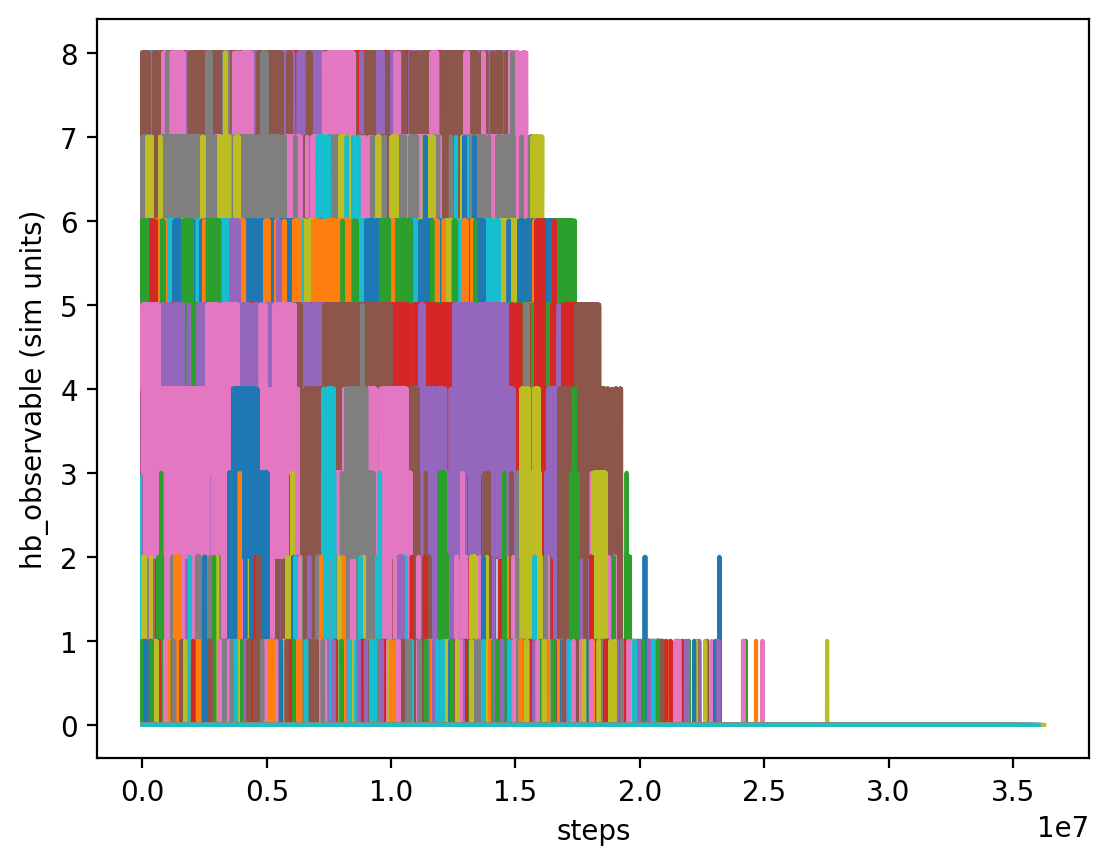

In [54]:
for us in us_list:
    us.com_distance_observable(com_list, ref_list)
    us.hb_list_observable(print_every=1)


for us in us_list:
    plt.figure(dpi=200)
    for idx in range(0,100,1):
        us.analysis.view_observable('prod', idx, observable=us.observables_list[1], sliding_window=False)
    # plt.legend([us.system], fontsize=7)

In [ ]:
fig, ax = plt.subplots()

vmmc_sim_list[1].analysis.plot_weighted_histogram(n_bins=1000, label='vmmc 52C', ax=ax)
for us in us_list:
    us.wham.plot_free_energy(ax = ax)
plt.legend()
plt.xlim(-1, 13)
plt.ylim(-0.5,10)

In [6]:
vmmc_sim_list[1].analysis.read_vmmc_op_data()
vmmc_sim_list[1].analysis.calculate_sampling_and_probabilities()


In [3]:
us_list[0].read_potential_energy()

In [11]:
e_state = [states.sum(axis=1) for states in us_list[0].potential_energy_by_window.values()]
e_state

[0        -1.403511
 1        -1.350488
 2        -1.355247
 3        -1.336339
 4        -1.320540
             ...   
 499996   -1.221529
 499997   -1.345405
 499998   -1.254268
 499999   -1.350305
 500000   -1.334267
 Length: 500001, dtype: float64,
 0        -1.320404
 1        -1.347557
 2        -1.427879
 3        -1.398720
 4        -1.385753
             ...   
 499996   -1.278386
 499997   -1.234616
 499998   -1.317854
 499999   -1.262735
 500000   -1.222281
 Length: 500001, dtype: float64,
 0        -1.216682
 1        -1.285005
 2        -1.272501
 3        -1.260083
 4        -1.236381
             ...   
 499996   -1.313118
 499997   -1.224452
 499998   -1.213211
 499999   -1.231020
 500000   -1.247326
 Length: 500001, dtype: float64,
 0        -0.830869
 1        -0.845315
 2        -0.893809
 3        -0.870937
 4        -0.904483
             ...   
 499996   -1.149775
 499997   -1.246686
 499998   -1.123067
 499999   -1.158676
 500000   -1.176694
 Length: 500001, dtyp

In [37]:
#Constants
STCK_FACT_EPS_OXDNA2 = 2.6717
STCK_BASE_EPS_OXDNA2 = 1.3523

# Initialize the variables
old_temperature = us_list[0].temperature

temperature_range = np.array((range(30, 70, 2)))
new_temperatures = (temperature_range + 273.15) / 3000
e_state = [states.sum(axis=1) for states in us_list[0].potential_energy_by_window.values()]
e_stack = [states['stacking'] for states in us_list[0].potential_energy_by_window.values()]
e_ext = 0  # Replace with actual value (external energy term)
am = 1  # Replace with actual value (the increment amount)
w = 0  # Replace with actual value (the weight)

# Initialize a list to store the results
results_list = []

for window_idx, (e_state_window, e_stack_window) in enumerate(zip(e_state, e_stack)):
    n_data_points = len(e_state_window)
    n_temps = len(new_temperatures)

    # Initialize a NumPy array for this window
    results_window = np.zeros((n_temps, n_data_points))

    # Calculate et for the old temperature (simtemp in C++)
    et_old = (e_stack_window * STCK_FACT_EPS_OXDNA2) / (STCK_BASE_EPS_OXDNA2 + old_temperature * STCK_FACT_EPS_OXDNA2)

    # Calculate e0 for the old temperature
    e0_old = e_state_window - old_temperature * et_old

    for temp_idx, new_temp in enumerate(new_temperatures):
        # Calculate et for the new temperature
        et_new = (e_stack_window * STCK_FACT_EPS_OXDNA2) / (STCK_BASE_EPS_OXDNA2 + new_temp * STCK_FACT_EPS_OXDNA2)

        # Calculate e0 for the new temperature
        e0_new = e_state_window - new_temp * et_new

        # Calculate the expression inside exp() for the new temperature
        energy_term = -(e0_old + e_ext + new_temp * et_new) / new_temp + (e0_old + e_ext + old_temperature * et_old) / old_temperature

        # Update results_window
        results_window[temp_idx, :] = am * np.exp(energy_term.values)

    # Add results_window to results_list
    results_list.append(results_window)



In [19]:
results_array[0][1]

array([2.13661996, 2.07389437, 2.07970198, ..., 1.95433611, 2.07081303,
       2.05232777])

In [40]:
us_list[0].termperature_interpolation(8, temperature_range)

In [38]:
bias = [
    [biases[0] / temp_bias
     for temp_bias in temperature_bias
    ] 
     for biases,temperature_bias in zip(bias, results_list)
]

In [ ]:
bias

In [ ]:
us_list[0].potential_energy_by_window[0].sum(axis=1)

In [ ]:
energy_bias_per_window_per_temperature, new_potential_energies, old_potential_energies = us_list[0]._calculate_energy_bias(temp_range)

In [ ]:
np.exp(old_potential_energies[0].sum(axis=1) / old_temperature - new_potential_energies[0][0] / new_temperatures[0])

In [ ]:
old_potential_energies[7]['stacking']

In [ ]:
old_epsilons = 1.3448 + 2.6568 * old_temperature
new_epsilon = 1.3448 + 2.6568 * new_temperatures

In [ ]:
old_epsilons / new_epsilon

In [ ]:
old_temperature = us_list[0].temperature
new_temperatures = (temp_range + 273.15) / 3000
energy_bias_per_window_per_temperature = [
    [np.exp( (old_potential.sum(axis=1) / old_temperature) - (new_pot / new_temp) )
     for new_pot, new_temp in zip(new_potential, new_temperatures)
    ]
    for old_potential, new_potential in zip(old_potential_energies, new_potential_energies)
]

In [ ]:
energy_bias_per_window_per_temperature[99]

In [64]:
temp_range = np.array((range(30, 70, 2)))
us_list[0].termperature_interpolation(8, temp_range)

In [65]:
us_list[0].prob_discrete

[array([9.90356215e-01, 1.31035215e-05, 7.31819153e-05, 3.66703755e-04,
        1.43234651e-03, 1.87341561e-03, 1.07901584e-03, 2.49223618e-03,
        2.31378120e-03]),
 array([9.89972978e-01, 1.31773409e-05, 7.42147115e-05, 3.74241421e-04,
        1.46992580e-03, 1.93278530e-03, 1.11868890e-03, 2.60472797e-03,
        2.43926089e-03]),
 array([9.89579479e-01, 1.32498237e-05, 7.52417498e-05, 3.81801035e-04,
        1.50786178e-03, 1.99304882e-03, 1.15919256e-03, 2.72054870e-03,
        2.56957610e-03]),
 array([9.89175612e-01, 1.33209835e-05, 7.62628669e-05, 3.89380732e-04,
        1.54614579e-03, 2.05419639e-03, 1.20052599e-03, 2.83973206e-03,
        2.70482334e-03]),
 array([9.88761269e-01, 1.33908339e-05, 7.72779069e-05, 3.96978674e-04,
        1.58476917e-03, 2.11621790e-03, 1.24268804e-03, 2.96231044e-03,
        2.84509808e-03]),
 array([9.88336348e-01, 1.34593888e-05, 7.82867217e-05, 4.04593052e-04,
        1.62372319e-03, 2.17910300e-03, 1.28567719e-03, 3.08831491e-03,
      

In [ ]:
plt.plot(range(9) ,vmmc_sim_list[1].statistics['wt_free'])
for temp,free in zip(temp_range, us_list[0].free_energy_discrete):
    plt.plot(range(9), free, label=f'{temp}')
plt.legend()


In [ ]:
vmmc_sim_list[1].statistics

In [3]:
us_list[0].continuous_to_discrete_unbiasing(8)

/scratch/mlsample/ipy_oxDNA/src/umbrella_sampling.py:648: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bias = np.array([1 / np.exp(-window /self.temperature) for window in self.umbrella_bias])
/scratch/mlsample/ipy_oxDNA/src/umbrella_sampling.py:649: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index_to_add_at = np.array([np.array(self.hb_by_window[idx].values.T[0]) for idx in range(self.n_windows)])


In [9]:
us_list[0].free_energy_discrete

array([ 2.24044335,  6.81260299, 11.45263622,  9.17230675,  4.65836507,
        4.16427654,  1.35463344,  0.        ,  1.2759371 ,         inf])

In [ ]:
us_list[0].make_last_hist_files()

In [ ]:
us_list[0].run_wham_discete(8)

In [ ]:
us_list[0].homebrew_discrete_wham(8)

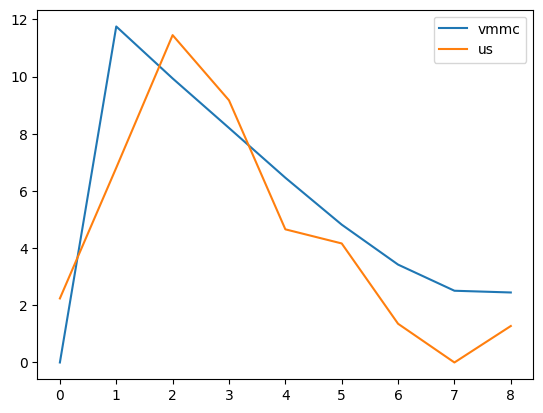

In [7]:
plt.figure()
plt.plot(range(9) ,vmmc_sim_list[1].statistics['wt_free'])
plt.plot(range(9), us_list[0].free_energy_discrete)
plt.legend(['vmmc', 'us'])

In [ ]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
for us, stiff in zip(us_list, k_value_list):
    us.wham_run(wham_dir, xmin, xmax, 5, n_bins, tol, n_boot)

In [ ]:
for file in us_list[0].production_sims[0].sim_files.file_list:
    if 'potential_energy.txt' in file:
        print(file)

In [ ]:
for us in us_list:
    us.read_potential_energy()

In [ ]:
us_list[0].potential_energy_by_window

In [ ]:
temperature_range = np.linspace(20, 70, 10)
_calculate_energy_bias

In [ ]:
import pyarrow
print(pyarrow.__version__)


<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Potential Energy Observalble</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

file_dir = f'{path}'
sim_dir = f'{file_dir}/potential_energy'

sim = Simulation(file_dir, sim_dir)


potential_energy_observable = Observable.potential_energy(print_every=100, split=True, name='potential_energy.txt')
simulation_manager = SimulationManager()

input_params = {
            "interaction_type": "DNA2",
            "salt_concentration": "0.1",
            "sim_type": "MD",
            "backend": "CPU",
            "backend_precision": "mixed",
            "use_edge": "1",
            "edge_n_forces": "1",
            "CUDA_list": "verlet",
            "CUDA_sort_every": "0",
            "max_density_multiplier": "3",
            "steps": "1e7",
            "ensemble": "nvt",
            "thermostat": "john",
            "T": "50C",
            "dt": "0.003",
            "verlet_skin": "0.5",
            "diff_coeff": "2.5",
            "newtonian_steps": "103",
            "lastconf_file": "last_conf.dat",
            "trajectory_file": "trajectory.dat",
            "refresh_vel": "1",
            "no_stdout_energy": "0",
            "restart_step_counter": "1",
            "energy_file": "energy.dat",
            "print_conf_interval": "1e4",
            "print_energy_every": "1e4",
            "time_scale": "linear",
            "max_io": "5",
            "external_forces": "0",
            "external_forces_file": "forces.json",
            "external_forces_as_JSON": "true"
            }

In [ ]:
sim.build(clean_build='force')
sim.add_observable(potential_energy_observable)
sim.input_file(input_params)

simulation_manager.queue_sim(sim)

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Parameter Scan</font></h2> 

In [5]:


path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

vmmc_sim_list[0].analysis.read_vmmc_op_data()
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()
vmmc_sim_list[0].analysis.calculate_and_estimate_melting_profiles()



In [ ]:
param_space = Space([
    Categorical([0.5, 1, 5, 10], name='k_value'),
    Categorical([25, 50, 70], name='temperature'),
    Categorical([True, False], name='unique_binding'),
    Categorical([1, 10, 100, 1000], name='print_every'),
    Categorical([5, 10, 15, 20], name='xmax'),
    Categorical([1e8, 5e8], name='production_step'),
    Categorical([20, 50], name='n_window')
])
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/parameter_optimization')
max_hb = 8
com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
vmmc_ground_truth = vmmc_sim_list[0]

In [ ]:
n_iterations = 3
batch_size = 3
run_baysian_hyperparameter_optimization(
    param_space,
    vmmc_ground_truth,
    max_hb, path,
    com_list,
    ref_list,
    n_iterations,
    batch_size,
    resume_state=None,
    subprocess=True
)

In [ ]:
vmmc_sim_list[0].analysis.sigmoid(samples[1], *vmmc_sim_list[0].analysis.popt)

In [ ]:
parameters = np.array([[1, 10], [50, 25], [True, False], [10, 100], [20, 10], [1e8, 1e8], [50, 50]], dtype='object')
ground_truth = vmmc_sim_list[0]


In [ ]:
run_baysian_hyperparameter_optimization

In [ ]:
spawn(objective_function, args=(ground_truth, max_hb,path, com_list, ref_list, *parameters))

In [ ]:
us.vmmc_sim.statistics

In [ ]:
vmmc_sim_list[0].analysis.read_vmmc_op_data()

In [ ]:
vmmc_sim_list[0].analysis.plot_statistics()

In [ ]:
os.getcwd()

In [ ]:
files = [file for file in os.listdir(path) if 'optimizer' in file]
which_number = sorted([int(file.split('.')[0].split('_')[-1]) for file in files])[-1]
for file in files:
    split = int(file.split('.')[0].split('_')[-1])
    if which_number == split:
        best_optim = [file]
best_optim[0]

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>K value scan</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

k_value_list = ['0.1', '0.5', '0.75', '1', '2', '5', '10']
systems = [f'duplex_30_{stiff}' for stiff in k_value_list]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 50
starting_r0 = 1
steps = 1e6
stiff = 0.4


pre_equlibration_parameters_list = [{'backend':'CPU','steps':'1e6','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'30C'} for _ in k_value_list]

equlibration_parameters_list = [{'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'30C'} for _ in k_value_list]

production_parameters_list = [{'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':f'30C'} for temp in k_value_list]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [ ]:
us_list.append(MeltingUmbrellaSampling(f'{path}/{system_name}', 'duplex_30', clean_build='force'))

In [ ]:
for us, pre_equlibration_parameters, stiff in zip(us_list, pre_equlibration_parameters_list, k_value_list):
    print(us.system)
    us.build_pre_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, steps,
                               print_every=100, observable=True, protein=None,
                               force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
for us, equlibration_parameters, stiff in zip(us_list, equlibration_parameters_list, k_value_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters,
                               print_every=100, observable=True, protein=None,
                               force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
for us, production_parameters, stiff in zip(us_list, production_parameters_list, k_value_list):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=100 ,protein=None,
                             force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
for us, stiff in zip(us_list, k_value_list):
    us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']): 

    ax = us_list[0].wham.plt_fig()
    for us in us_list:
        us.wham.plot_free_energy(ax=ax)
    
    plt.legend(fontsize=6)
    
plt.xlabel('Center of mass distance (nm)')


In [ ]:
n_chunks = 2
data_added_per_iteration = 3

wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'


for us in us_list:
    us.wham.get_n_data_per_com_file()
    us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>K value scan plotting</font></h2> 

In [ ]:
for us in us_list:
    us.com_distance_observable(com_list, ref_list)


for us in us_list:
    plt.figure(dpi=200)
    for idx in range(0,50,1):
        us.analysis.view_observable('prod', idx, observable=us.observables_list[0], sliding_window=False)
    # plt.legend([us.system], fontsize=7)

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Duplex Melting Movie</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

systems = ['duplex_melting_movie']
temperature_list = [50]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 100

stiff = 0.4

equlibration_parameters_list = [{'backend':'CPU','steps':'1e6','print_energy_every': '1e3',
                           'print_conf_interval':'1e3', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'{temp}C'} for temp in temperature_list]

production_parameters_list = [{'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':f'{temp}C'} for temp in temperature_list]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [ ]:
for us, equlibration_parameters in zip(us_list, equlibration_parameters_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters,
                               print_every=1000, observable=True, protein=None,
                               force_file=None, continue_run=False)

simulation_manager.run(cpu_run=True, gpu_mem_block=False)



<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Temp Scan</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

systems = ['duplex_25', 'duplex_30', 'duplex_35', 'duplex_40', 'duplex_45', 'duplex_50', 'duplex_55', 'duplex_60', 'duplex_65', 'duplex_70']
temperature_list = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 100

stiff = 0.4

equlibration_parameters_list = [{'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'{temp}C'} for temp in temperature_list]

production_parameters_list = [{'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':f'{temp}C'} for temp in temperature_list]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Temp scan convergence analysis</font></h2> 

In [ ]:
n_chunks = 2
data_added_per_iteration = 3

wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
xmin = 0
xmax = 15
n_windows = 100

stiff = 0.4

for us in us_list:
    us.wham.get_n_data_per_com_file()
    us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
for us in us_list:
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)

In [ ]:
us_list.append(MeltingUmbrellaSampling(f'{path}', f'us_melting_52_no_non_canonical', clean_build='force'))

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Temp Scan plotting</font></h2> 

In [ ]:
for us in us_list:
    us.com_distance_observable(com_list, ref_list)


for us in us_list:
    plt.figure(dpi=200)
    for idx in range(0,100,1):
        us.analysis.view_observable('prod', idx, observable=us.observables_list[1], sliding_window=20)
    plt.legend([us.system], fontsize=7)

In [ ]:
for us in us_list:
    if us.free['Free'].iloc[4] != 0:
        us.free['Free'] = us.free['Free'].subtract(us.free['Free'].iloc[4])

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']): 

    ax = us_list[0].wham.plt_fig()
    for us in us_list:
        us.wham.plot_free_energy(ax=ax, errorevery=20)
    
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, errorevery=20)
    # plt.legend(['52C umbrella all hydrogen bonds', '52C umbrella only intended bonds', '52C VMMC all hydrogen bonds (only biased to sample intended bonds)'] ,fontsize=6)
    
    plt.legend(fontsize=5)
    plt.xlabel('Center of mass distance (nm)')
    plt.xlim(-0.75,15)
    # plt.ylim(-0.25, 12)

In [ ]:
[[us_list[sys].production_sims[window].analysis.get_conf_count() for window in range(n_windows)]for sys in range(3)] 

In [ ]:
for us, equlibration_parameters in zip(us_list[-1:], equlibration_parameters_list[-1:]):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters,
                               print_every=1000, observable=True, protein=None,
                               force_file=None, continue_run=False)

simulation_manager.worker_manager(cpu_run=True, gpu_mem_block=False)



In [ ]:
for us, production_parameters in zip(us_list[-1:], production_parameters_list[-1:]):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=1000 ,protein=None,
                             force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)


<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Multisystem umbrella sampling</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

systems = ['print_100_normal_1e9', 'print_100_unique_1e9']
print_every_list = [100, 100]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 6
n_windows = 50
max_hb = 8
stiff = 0.8

equlibration_parameters = {'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':'52C'
                          }

production_parameters ={'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':'52C'
                        }

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()



<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Continuous to Discrete Unbiasing</font></h2> 

In [ ]:
max_hb = 8

In [ ]:
def count_division_normalize(arr):
    row_sums = np.sum(arr, axis=1, keepdims=True)
    return arr / row_sums

for us, stiff in zip(us_list[:-1], k_value_list):
    print(us.system)
    us.get_com_distance_by_window()
    us.get_hb_list_by_window()
    us.get_bias_potential_value(xmin, xmax, n_windows, stiff)
    
    for idx in us.hb_by_window.keys():
        hb_values = np.array(us.hb_by_window[idx].values.T[0])
        to_remove = np.where(hb_values > max_hb)[0]  # Indices where hb_values > max_hb
        if len(to_remove > 0):
        # Remove rows from hb_by_window DataFrame
            us.hb_by_window[idx].drop(index=to_remove, inplace=True)
            us.hb_by_window[idx].reset_index(drop=True, inplace=True)
            
            # Remove corresponding rows from umbrella_bias DataFrame
            us.umbrella_bias[idx].drop(index=to_remove, inplace=True)
            us.umbrella_bias[idx].reset_index(drop=True, inplace=True)
            
    unbiased_discrete_window = np.array([np.zeros(max_hb + 1) for _ in range(n_windows)])
    bias = np.array([1 / np.exp(-window /us.temperature) for window in us.umbrella_bias])
    print(us.temperature)
    index_to_add_at = np.array([np.array(us.hb_by_window[idx].values.T[0]) for idx in range(n_windows)])
    
    for idx in range(n_windows):
        np.add.at(unbiased_discrete_window[idx], index_to_add_at[idx], bias[idx][0])
  
    normalized_array = count_division_normalize(unbiased_discrete_window)
    new_array_v2 = np.zeros(unbiased_discrete_window.shape[1])
    
    # Iterate through each row and index
    for i, row in enumerate(normalized_array):
        new_array_v2 += row * unbiased_discrete_window[i]
    us.counts_discrete = new_array_v2
    # Normalize the new array using count division normalization
    new_array_sum_v2 = np.sum(new_array_v2)
    normalized_new_array_v2 = new_array_v2 / new_array_sum_v2
    us.free_energy_discrete = -np.log(normalized_new_array_v2)
    us.free_energy_discrete -= min(us.free_energy_discrete)
    us.prob_discrete = normalized_new_array_v2

In [ ]:
for us in us_list[:-1]:
    plt.plot(range(9), us.free_energy_discrete, label=us.system)
plt.legend()

In [ ]:
for us in us_list[:-1]:
    us.calculate_melting_temperature_using_vmmc()

In [ ]:
inverted_finfs = []
temperatures = []
for us in us_list[:-1]:
    inverted_finfs.append(1 - us.vmmc_sim.analysis.finfs[0])
    temperatures.append(float((us.system.split('_')[-1])))
# del inverted_finfs[2]
# del temperatures[2]
inverted_finfs

In [ ]:
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

from scipy.optimize import curve_fit

p0 = [max(inverted_finfs), np.median(temperatures), 1, min(inverted_finfs)]  # initial guesses for L, x0, k, b
popt, _ = curve_fit(sigmoid, temperatures, inverted_finfs, p0, method='dogbox')

x_fit = np.linspace(min(temperatures), max(temperatures), 500)
y_fit = sigmoid(x_fit, *popt)

idx = np.argmin(np.abs(y_fit - 0.5))
Tm = x_fit[idx]

In [ ]:
# Plotting
# plt.figure(figsize=(10, 6))
vmmc_sim_list[0].analysis.plot_melting_profiles(label='VMMC Discrete ')

plt.scatter(temperatures, inverted_finfs, marker='o', label='Continous umbrella made discrete data')
plt.plot(x_fit, y_fit, linestyle='--', linewidth=2, label='Continous umbrella made discrete Sigmoid Fit')

# Add a vertical line at the melting temperature
plt.axvline(x=Tm, color='green', linestyle='--', linewidth=2, label=f'Continous umbrella made discrete Tm = {Tm:.2f} °C')

plt.xlabel('Temperature (°C)')
plt.ylabel('Fraction of ssDNA')
plt.title(f'Melting Profile')

# Set y-axis limits
plt.ylim(0, 1.1)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.plot(inv_finfs.keys(), inv_finfs.values())

In [ ]:
# vmmc_sim_list[0].analysis.last_hist_analysis()
inv = 1 -  np.array(vmmc_sim_list[0].analysis.finfs)
inv

In [ ]:
us_list[1].vmmc_sim.statistics

In [ ]:
us.vmmc_sim.statistics

In [ ]:
free = vmmc_sim_list[0].statistics['wt_free'] - vmmc_sim_list[0].statistics['wt_free'].values[-1]
us.free_energy_discret us.free_energy_discrete - us.free_energy_discrete[-1]

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']): 
    ax = us_list[0].wham.plt_fig()
    for us in us_list:
        temp = us.free_energy_discrete - us.free_energy_discrete[-1]
        ax.plot(range(9), temp, label=us.system)
    ax.plot(range(9), free, label='discrete')

    plt.legend(fontsize=6)
    ax.set_xlabel('Number of Hydrogen Bonds')

In [ ]:
biases = us_list[1].umbrella_bias
shift = np.array(us_list[1].get_biases(), dtype=float)

energy = [np.exp(-bias + shift) for bias, shift in zip(biases, shift)]

In [ ]:
np.zeros(max_hb)

In [ ]:
us_list[1].unbias_com_to_hb(xmin, xmax, n_windows, stiff, max_hb)

In [ ]:
prob = us_list[1].run_wham_discete(8)

In [ ]:
prob = us_list[1].homebrew_discrete_wham(9)

In [ ]:
prob.tolist()

In [ ]:
inv = 1 -  np.array(vmmc_sim_list[0].analysis.finfs)
inv[9]

In [ ]:
vmmc_sim_list[0].analysis.temperatures.index(52)

In [ ]:
com_by_window = us_list[1].com_by_window
hb_by_window = us_list[1].hb_by_window
umbrella_bias = us_list[1].umbrella_bias
shift = np.array(us_list[1].get_biases(), dtype=float)

umbrella_bias = [np.exp(-bias) for bias, shift in zip(umbrella_bias, shift)]

In [ ]:
unbiased_discrete_window = {idx:np.zeros(int(max_hb + 1)) for idx in range(n_windows)}
for idx in range(n_windows):
    index_to_add_at = np.array(hb_by_window[idx].values.T[0])
    biases = np.array([value for value in umbrella_bias[idx].values.T[0]])
    value_to_add = 1 / biases
    np.add.at(unbiased_discrete_window[idx], index_to_add_at, value_to_add)
print(unbiased_discrete_window)

In [ ]:
unbiased = [hist) - s for hist,s in zip(unbiased_discrete_window.values(), shift)]

In [ ]:
unbiased

In [ ]:
sum_of_hist = np.zeros(9)
for hist in unbiased:
    sum_of_hist += hist
sum_of_hist /= sum(sum_of_hist)

In [ ]:
sum_of_hist.tolist()

In [ ]:
us.discrete_hist.values()

In [ ]:
plt.plot(range(9), -np.log(list(us.discrete_hist.values())))
plt.plot(range(9), -np.log(sum_of_hist))

In [ ]:
counters = [sum(hist) for hist in unbiased_discrete_window.values()]

In [ ]:
new_hist = [hist / count for hist,count in zip(unbiased_discrete_window.values(), counters)]

In [ ]:
new_hist

In [ ]:
us_list[0].homebrew_discrete_wham(9)

In [ ]:
max_hb = 8
plt.figure()
plt.plot(range(9), vmmc_sim_list[0].statistics['wt_free'], label='discrete')
plt.plot(range(9), -np.log(us_list[0].homebrew_discrete_wham(9)), label='here')

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Multisystem umbrella sampling</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

systems = ['print_100_normal_1e9', 'print_100_unique_1e9']
print_every_list = [100, 100]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 6
n_windows = 50

stiff = 0.8

equlibration_parameters = {'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':'52C'
                          }

production_parameters ={'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':'52C'
                        }

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [ ]:
for us, print_every in zip(us_list, print_every_list):
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters,
                               print_every=print_every, observable=True, protein=None,
                               force_file=None, continue_run=False)


In [ ]:
us_list[1].modify_topology_for_unique_pairing()

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
for us, print_every in zip(us_list, print_every_list):
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=print_every,protein=None,
                             force_file=None, continue_run=False)


In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)


In [ ]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
for us in us_list:
    us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']): 
    ax = us_list[0].wham.plt_fig()
    for us in us_list:
        us.wham.plot_free_energy(ax=ax)
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=1000, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    plt.legend(fontsize=6)
    plt.xlim(0, 6)
    plt.ylim(0, 8)

In [ ]:
for us in us_list:
    us.com_distance_observable(com_list, ref_list)


for us in us_list[:2]:
    plt.figure(dpi=200)
    for idx in range(0,100,1):
        us.analysis.view_observable('prod', idx, sliding_window=50, observable=us.observables_list[0])#, observable=us.observables_list[0], sliding_window=20)
    plt.legend([us.system], fontsize=7)

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Unbiased equlibration</font></h2> 

In [ ]:
simulation_manager = SimulationManager() 
simulation_manager.start_nvidia_cuda_mps_control(pipe='temp')

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/duplex_melting'
sim_dir = f'{file_dir}/unbiased_no_non_canonical_bonds_1'

sim = Simulation(file_dir, sim_dir)

In [ ]:
sim.build(clean_build='force')
sim.input_file({'backend':'CPU', 'steps':'1e7','print_energy_every': '1e4', 'print_conf_interval':'1e4', "CUDA_list": "no", 'use_edge': 'false'})

In [ ]:
sim.modify_topology_for_unique_pairing()

In [ ]:
sim.oxpy_run.run(subprocess=True)

In [ ]:
sim.oxpy_run.process.terminate()

In [ ]:
sim.analysis.plot_energy()
sim.analysis.view_last()

<font size='7'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Initalize Vmmc Replicas</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

p1 = '15,14,13,12,11,10,9,8'
p2 = '0,1,2,3,4,5,6,7'
pre_defined_weights = [8, 16204, 1882.94, 359.746, 52.5898, 15.0591, 7.21252, 2.2498, 2.89783]

sim_parameters = {'T':'52C', 'steps':'1e9','print_energy_every': '1e5','print_conf_interval':'1e6'}

In [ ]:
vmmc_sim_list[0].analysis.read_vmmc_op_data()
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    # us_1.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuous umbrella sampling 52C all bonds')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    ax.set_xlim(-0.1,8)
    plt.ylim(-0.1,9)
plt.legend(fontsize=6)

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    # vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    us_1.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuous umbrella sampling 52C all bonds')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    # ax.set_xlim(-0.1,8)
    # plt.ylim(-0.1,9)
plt.legend(fontsize=6)

<font size='7'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Umbrella sampling melting</font></h2> 

In [ ]:
simulation_manager = SimulationManager()

path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/duplex_melting'
system = 'us_melting_52_cpu'

com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 6
n_windows = 100

stiff = 0.8

equlibration_parameters = {'backend':'CPU','steps':'1e7','print_energy_every': '5e6',
                           'print_conf_interval':'5e6', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':'52C'
                          }

production_parameters ={'backend':'CPU','steps':'2e9','print_energy_every': '2e7',
                        'print_conf_interval':'2e7', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':'52C'
                        }

us_1 = MeltingUmbrellaSampling(file_dir, system, clean_build=True)


In [ ]:
simulation_manager = SimulationManager()

path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/duplex_melting'
system = 'us_melting_52_no_non_canonical_10'

com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 6
n_windows = 100

stiff = 0.8

equlibration_parameters = {'backend':'CPU','steps':'1e7','print_energy_every': '5e6',
                           'print_conf_interval':'5e6', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':'52C'
                          }

production_parameters ={'backend':'CPU','steps':'2e9','print_energy_every': '2e7',
                        'print_conf_interval':'2e7', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':'52C'
                        }

us = MeltingUmbrellaSampling(file_dir, system, clean_build=True)


<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Build and run</font></h2> 

In [ ]:
us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters,
                           observable=True, sequence_dependant=False, print_every=10, name='com_distance.txt',
                           continue_run=False)

In [ ]:
us.modify_topology_for_unique_pairing()

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
us.build_production_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, production_parameters,
                           observable=True, sequence_dependant=False, print_every=10, name='com_distance.txt',
                        continue_run=False)

In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
dir(us.equlibration_sims[0].sim_files)

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Run time analysis methods</font></h2> 

In [ ]:
us.analysis.view_conf('eq', 7)

In [ ]:
us.com_distance_observable(com_list, ref_list, print_every=10)
us.hb_list_observable(print_every=10)
plt.figure(dpi=50)
for idx in range(0,100,1):
    us.analysis.hist_observable('prod', idx, observable=us.observables_list[0])#, sliding_window=False)#, bins=200)#)
# plt.legend(fontsize=4)

In [ ]:
for idx in range(0,48):
    print(idx)
    us.equlibration_sims[idx].sim_files.last_conf

In [ ]:
us.analysis.view_conf('eq', 13)

In [ ]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    # ax.set_xlim(-0.1,8)
    # plt.ylim(-0.1,9)
plt.legend(fontsize=6)

In [ ]:
us.free

<font size='8'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Post run reinitalization </font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
file_dir = f'{path}/duplex_melting'
systems = ['us_melting_10', 'us_melting', 'us_melting_30','us_melting_40', 'us_melting_62']

us_list = [MeltingUmbrellaSampling(file_dir, system) for system in systems]

In [ ]:
us_list[0].fig_ax()

for us in us_list:
    us.wham.plot_free_energy(ax=us_list[0].ax, errorevery=10)
plt.legend([f'{10 + 273}K', f'{20 + 273}K', f'{30 + 273}K', f'{40 + 273}K', f'{62 + 273}K'])
plt.title('8nt Duplex Melting Free Energy Profile')
plt.xlabel('COM Distance (nm)')

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Convergence analysis </font></h2> 

In [ ]:
n_data = 50000

n_chunks = 2
data_added_per_iteration = 3

wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
xmin = 0
xmax = 6
n_windows = 50

stiff = 0.8

for us in us_list:
    us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
us.wham.plot_truncated_free_energy()
plt.legend()
plt.title(us.system)
us.wham.plot_chunks_free_energy()
plt.legend()
plt.title(us.system)

In [ ]:
n_data = 50000

n_chunks = 2
data_added_per_iteration = 3

wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
xmin = 0
xmax = 8
n_windows = 95

stiff = 0.8

for us in us_list:
    if 'us_melting_62' in us.system:
        us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, 5, stiff, n_bins, tol, n_boot)
    else:
        us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
for us in us_list:
    
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>In progress: Com unbiasing </font></h2> 

In [ ]:
xmin = 0
xmax = 6
n_windows = 100
stiff = 0.8
max_hb = 8

us.unbias_com_to_hb(xmin, xmax, n_windows, stiff, max_hb)

In [ ]:
x_range = np.round(np.linspace(xmin, xmax, (n_windows + 1))[1:], 3)

1 / (0.5 * stiff * (x_range[0] - list(us.com_by_window.values())[0][0][0])**2)

In [ ]:
list(us.com_by_window.values())[0][0][0]

In [ ]:
us.get_bias_potential_value(xmin, xmax, n_windows, stiff)
weight = 1 / us.umbrella_bias[0]

In [ ]:
sum(weight.values)

In [ ]:
us.make_last_hist_files()

In [ ]:
normalized_bins = {}

discrete_bins = list(range(max_hb + 1))
for key, value in us.unbiased_discrete_windows.items():
    normalized_bins[key] = value / sum(value)

In [ ]:
normalized_bins

In [ ]:
hist = np.zeros(int(max_hb + 1))
for key, value in normalized_bins.items():
    hist += value
    
hist = hist / sum(hist)
plt.plot(discrete_bins, -np.log(hist))


In [ ]:
us.get_biases()

In [ ]:
us.run_wham_discete(max_hb)

In [ ]:
us.discrete_hist

In [ ]:
plt.plot(us.discrete_hist.keys(), -np.log(list(us.discrete_hist.values())), label='Continuous made discrete')
plt.plot(range(9), vmmc_sim_list[0].statistics['wt_free'], label='discrete')
# plt.plot(discrete_bins, -np.log(hist))
plt.legend()

In [ ]:
us.hb_by_window[0].shape[0]

In [ ]:
vmmc_sim_list[0].analysis.read_vmmc_op_data()

In [ ]:
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()

In [ ]:
plt.plot(range(9), vmmc_sim_list[0].statistics['wt_free'])

In [ ]:
plt.plot(vmmc_sim_list[0].vmmc_df['h_bonds'], np.log(vmmc_sim_list[0].vmmc_df['wt_occ']))

In [ ]:
vmmc_sim_list[0].analysis.calculate_weighted_histogram()

In [ ]:
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()

In [ ]:
import numpy as np
biases = np.array(us.get_biases())
# biases = [float(bias) / ((273 + 20) / 3000) for bias in biases]
free_shift = [float(bias) for bias in biases]
bins = np.linspace(0, 8, 200)
com_by_window = us.get_com_distance_by_window()
histograms = [np.histogram(coms, bins=bins) for coms in com_by_window.values()]

In [ ]:
com_by_window

In [ ]:
# Optimize the weighted property calculation function by vectorizing operations where possible
def calculate_weighted_property_optimized(com_distance_dfs, hb_list_dfs, metadata_df, F_i_values):
    weighted_property = {}
    # Constants
    K_B = 1  # Boltzmann constant in simulation units
    T = 1  # Temperature in simulation units
    
    # Reset the index of metadata DataFrame
    metadata_df = metadata_df.reset_index(drop=True)
    
    for i, (com_distance_df, hb_list_df) in enumerate(zip(com_distance_dfs.values(), hb_list_dfs.values())):
        # Reset the index for both DataFrames for consistent indexing
        com_distance_df = com_distance_df.reset_index(drop=True)
        hb_list_df = hb_list_df.reset_index(drop=True)
        
        # Fetch window-specific parameters
        k_i = metadata_df.loc[i, 'Spring']
        x_0_i = metadata_df.loc[i, 'Loc_win_min']
        F_i = F_i_values[i]
        
        # Vectorized calculation of the weighting factor (Equation 13 in the WHAM paper)
        weighting_factor = np.exp((F_i - 0.5 * k_i * (com_distance_df['Value'] - x_0_i)**2) / (K_B * T))
        
        # Vectorized calculation of the weighted property (T(x))
        hb_values = hb_list_df['Value']
        weighted_numerator = weighting_factor * com_distance_df['Value']
        weighted_denominator = weighting_factor
        
        for x, (numerator, denominator) in zip(hb_values, zip(weighted_numerator, weighted_denominator)):
            if x not in weighted_property:
                weighted_property[x] = {'numerator': 0.0, 'denominator': 0.0}
            weighted_property[x]['numerator'] += numerator
            weighted_property[x]['denominator'] += denominator
    
    # Calculate the final weighted property T(x) (Equation 14 in the WHAM paper)
    weighted_property_result = {x: props['numerator'] / props['denominator'] for x, props in weighted_property.items()}
    
    return weighted_property_result

# Re-run the weighted property calculation with the optimized function
weighted_property_result_optimized = calculate_weighted_property_optimized(all_com_distance_dfs, all_h_bonds_dfs, metadata_df, F_i_values_fixed)

weighted_property_result_optimized

In [ ]:
def get_bias_potential_value(com_by_window, xmin, xmax, n_windows, stiff):
    x_range = np.round(np.linspace(xmin, xmax, (n_windows + 1))[1:], 3)
    umbrella_bias = [0.5 * stiff * (com_values - eq_pos)**2 for com_values, eq_pos in zip(com_by_window.values(), x_range)]
    return umbrella_bias
                     
def weighted_average_time_series(biases, com_by_window, xmin, xmax, n_windows, stiff):
    bias_potential_values = get_bias_potential_value(com_by_window, xmin, xmax, n_windows, stiff)
    
    exp_term = [np.exp(bias - free) for bias, free in zip(bias_potential_values, free_shift)]
    
    denominator = sum([sum(term) for term in exp_term])
    
    numberator = sum([sum(time_series * term) for time_series, term in zip(com_by_window, exp_term)])
    
    
    return numberator / denominator
        
    
    
    
def wham_probability_equation(histograms, free_shift, com_by_window, xmin, xmax, n_windows, stiff):
    #get the histogram counts
    counts = [hist[0] for hist in histograms]
    #get hist bins
    bins = histograms[0][1]
    #compute the numerator
    sum_of_counts_over_all_windows = sum(counts)
    #
    umbrella_bias = get_bias_potential_value(com_by_window, xmin, xmax, n_windows, stiff)
    shift_minus_umbrella_bias = [ sum(np.exp(free - bias)) for free, bias in zip(free_shift, umbrella_bias)]
    print(len(sum_of_counts_over_all_windows))
    
    return None

wham_probability_equation(histograms, free_shift, com_by_window, xmin, xmax, n_windows, stiff)

In [ ]:
histograms = [np.histogram(coms, bins=bins) for coms in com_by_window.values()]

In [ ]:
histograms

In [ ]:
import numpy as np
biases = np.array(us.get_biases())
# biases = [float(bias) / ((273 + 20) / 3000) for bias in biases]
free_shift = [float(bias) for bias in biases]
bins = np.linspace(0, 8, 200)
com_by_window = us.get_com_distance_by_window()
histograms = [np.histogram(coms, bins=bins) for coms in com_by_window.values()]

In [ ]:
def get_window_bias_potential_value(bins, xmin, xmax, n_windows, stiff):
    x_range = np.round(np.linspace(xmin, xmax, (n_windows + 1))[1:], 3)
    bins = bins[1:]
    print(bins)
    print(x_range)
    diffrence = [com_values - eq_pos for com_values, eq_pos in zip(bins, x_range)]
    umbrella_bias = [0.5 * stiff * (com_values - eq_pos)**2 for com_values, eq_pos in zip(bins, x_range)]
    return diffrence

get_window_bias_potential_value(bins, xmin, xmax, n_windows, stiff)


In [ ]:
#I want to 
umbrella_bias = get_bias_potential_value(bins, xmin, xmax, n_windows, stiff)
com_values = list(com_by_window.values())

In [ ]:
umbrella_bias = get_bias_potential_value(bins, xmin, xmax, n_windows, stiff)
umbrella_bias

In [ ]:
master_H = np.zeros(199)

for (H, bins), free, bias in zip(histograms, free_shift, umbrella_bias):
    # print(H)
    # H = H * bias
    # print(H)
    H = np.array([-np.log(count) if count > 0 else 0 for count in H])
    H = H - bias + free
    # print(H)
    # H = np.array([np.exp(-count) for count in H])
    # H = np.array([count if count != 1 else 0 for count in H ])
    print(H)
    master_H += H

master_H = master_H

In [ ]:
master_H /= sum(master_H)
weight_avg = bins[1:] * master_H

In [ ]:
sum(weight_avg) * 0.85

In [ ]:
weight_avg

In [ ]:
plt.plot(bins[1:] * 0.85, master_H)

In [ ]:
for (H, bins), bias in zip(histograms, biases):
    plt.plot(bins[1:], -np.log(H) * bias)

In [ ]:
master_H

In [ ]:
H

In [ ]:
n_data = 50000

n_chunks = 2
data_added_per_iteration = 2

wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
xmin = 0
xmax = 5
n_windows = 46

stiff = 0.8

us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
us.wham.plot_truncated_free_energy()
plt.legend()
us.wham.plot_chunks_free_energy()
plt.legend()

<font size='8'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Convergence analysis</font></h2>

In [ ]:
maxes =  [free_energy['Free'] for free_energy in us.chunk_dirs_free]

In [ ]:
for us in us_list:
    us.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
free = pd.read_csv(f'{us.system_dir}/production/com_dir/freefile', sep='\t')

In [ ]:
free_vals = free.iloc[-95:].Free

In [ ]:
free_vals.iloc[1:]

In [ ]:
H_vals = np.zeros(94)
us.hb_list_observable(print_every=1e3)
for idx, sim in enumerate(us.production_sims):
    sim_dir = sim.sim_dir
    file_name = us.observables_list[1]['output']['name']
    df = pd.read_csv(f"{sim_dir}/{file_name}", header=None)
    df = np.concatenate(np.array(df))
    H, bins = np.histogram(df, density=False, bins=np.linspace(0, 8, 95))
    H_vals += H

In [ ]:
prob_H = H_vals / sum(H_vals)

In [ ]:
plt.plot(bins[:-1], -np.log(prob_H))

In [ ]:
file_name = us.observables_list[0]['output']['name']